# Laboratory Nine

In [26]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

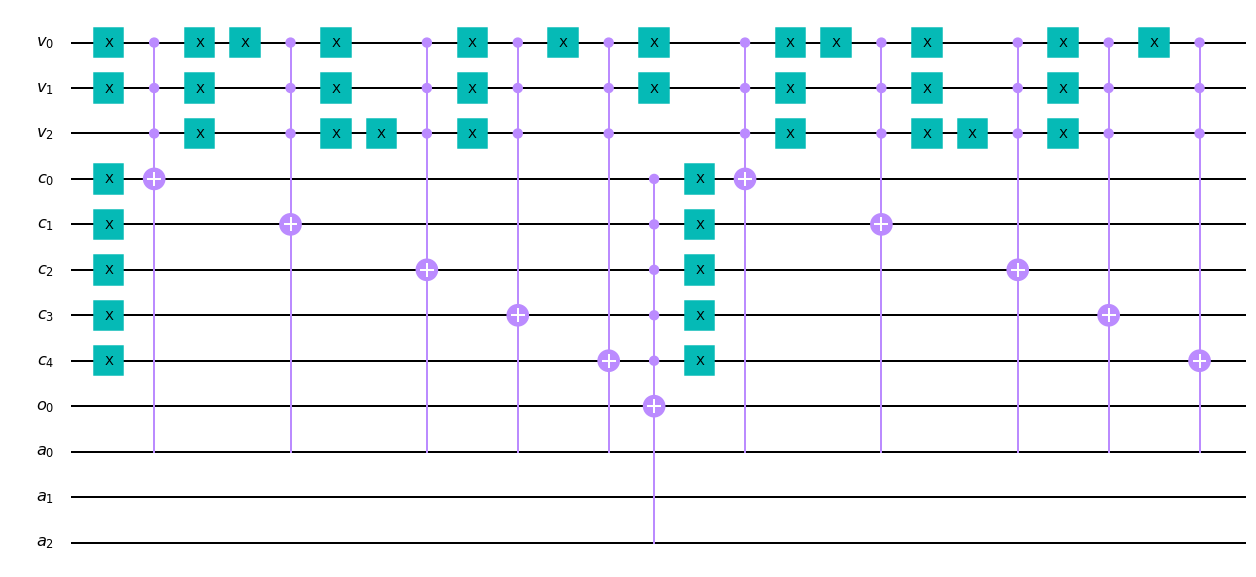

In [27]:
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''
oracle = LogicalExpressionOracle(input_3sat)
oracle.construct_circuit()
orc = oracle.circuit
orc.draw('mpl')

In [28]:
oracle = LogicalExpressionOracle(input_3sat)

In [29]:
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])

[1, 2, -3]


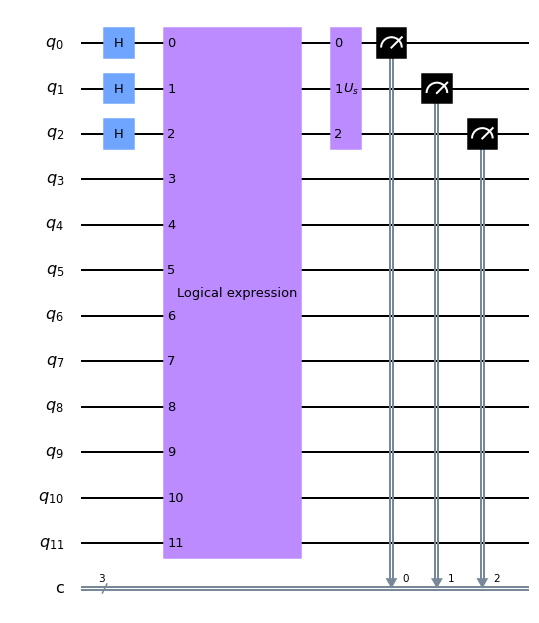

In [30]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    for qubit in range(nqubits):
        qc.h(qubit)
        
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    
    for qubit in range(nqubits):
        qc.x(qubit)
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

qc = QuantumCircuit(12,3)
oracle_gate = orc.to_gate()
oracle_gate.name = 'logical expression'
qc = initialize_s(qc,[0,1,2])
qc.append(oracle_gate, [0,1,2,3,4,5,6,7,8,9,10,11])
qc.append(diffuser(3), [0,1,2])
qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')

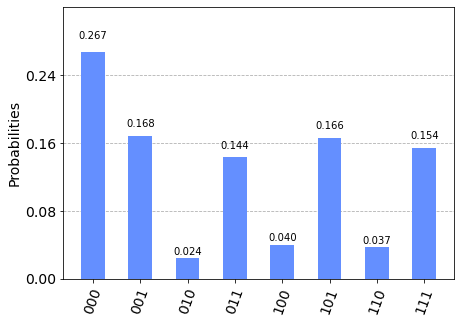

In [25]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

### Laboratory Exercise
Now for the interesting part of the experiment. We have only done one iteration of Grover’s
algorithm. The results that we’ve got look reasonable. But what happens when we do more
iterations? For your part of the laboratory try two and three iterations of Grover’s algorithm.
Remember increasing the number of iterations is just a matter of cutting and pasting two lines of
code. Cut and paste the histograms that you produce into the report for this laboratory. What do
you observe from this experiment? Submit your report as a PDF or PNG file.

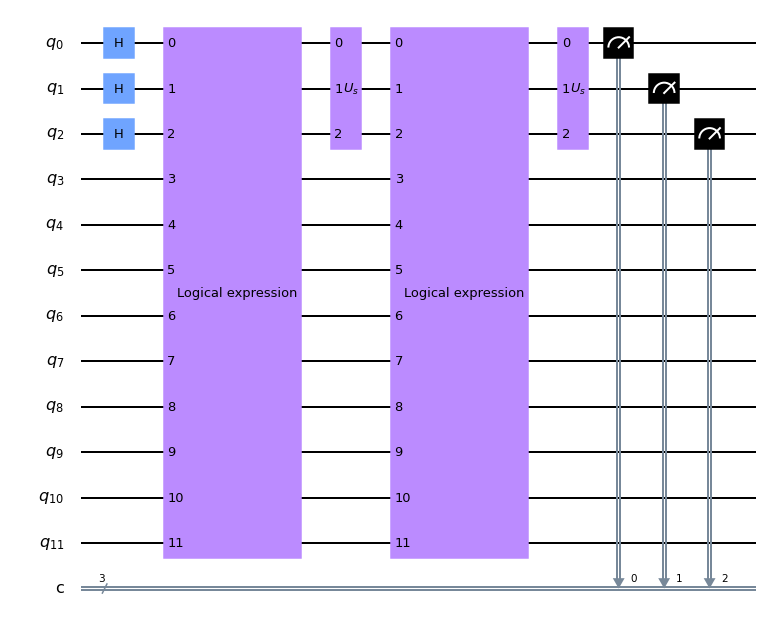

In [31]:
qc = QuantumCircuit(12,3)
oracle_gate = orc.to_gate()
oracle_gate.name = 'logical expression'
qc = initialize_s(qc,[0,1,2])
qc.append(oracle_gate, [0,1,2,3,4,5,6,7,8,9,10,11])
qc.append(diffuser(3), [0,1,2])
qc.append(oracle_gate, [0,1,2,3,4,5,6,7,8,9,10,11])
qc.append(diffuser(3), [0,1,2])
qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')

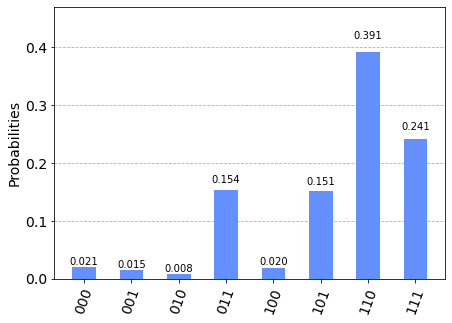

In [32]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

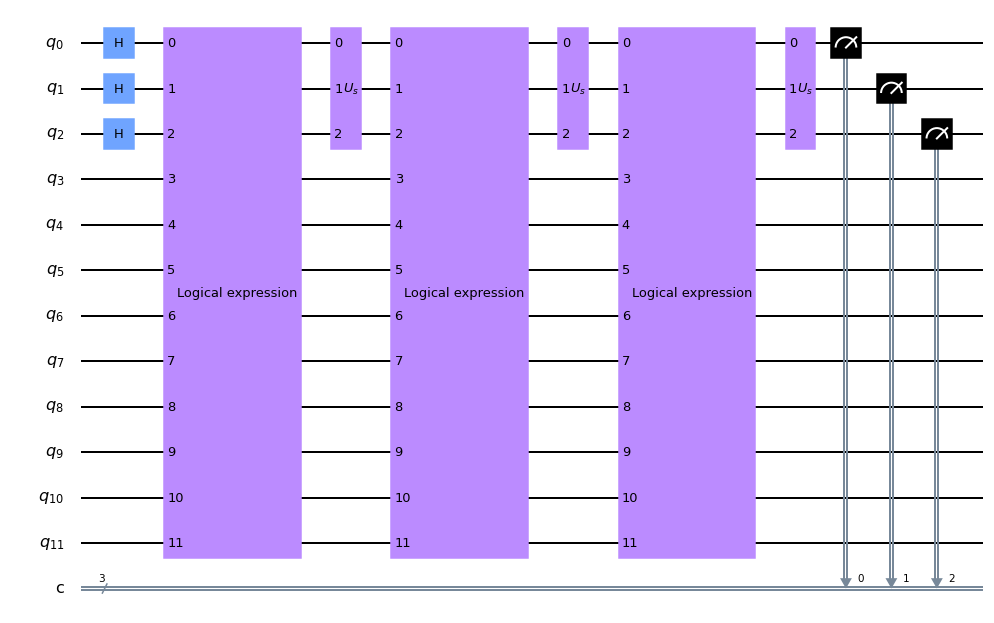

In [33]:
qc = QuantumCircuit(12,3)
oracle_gate = orc.to_gate()
oracle_gate.name = 'logical expression'
qc = initialize_s(qc,[0,1,2])
qc.append(oracle_gate, [0,1,2,3,4,5,6,7,8,9,10,11])
qc.append(diffuser(3), [0,1,2])
qc.append(oracle_gate, [0,1,2,3,4,5,6,7,8,9,10,11])
qc.append(diffuser(3), [0,1,2])
qc.append(oracle_gate, [0,1,2,3,4,5,6,7,8,9,10,11])
qc.append(diffuser(3), [0,1,2])
qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')

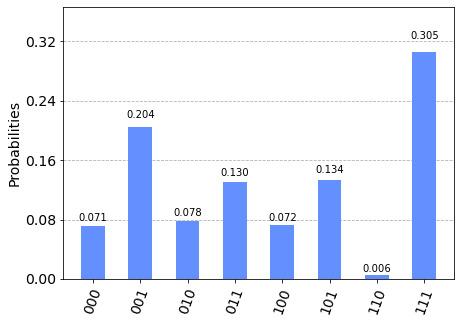

In [34]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)